## Градиентный спуск

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса линейной модели.

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

### Класс `MSELoss`


In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # возвращаю ошибку по формуле
        return (np.linalg.norm((X @ w.T - y))**2)/len(y)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # возвращаю градиент по формуле
        return 2*(X.T @ (X @ w.T - y))/len(y)
        

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))


27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]


Формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

### Функция `gradient_descent`

In [6]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    path = [w_init] 
    
    # с помощью цикла провожу итерации градиентного спуска, где записываю последующие веса модели, беря для их вычисления самый последний набор весов в траектории
    for _ in range(n_iterations - 1): path.append(path[-1] - lr*loss.calc_grad(X, y, path[-1]))
    
    # возвращаю траекторию спуска
    return path

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [8]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649649


In [9]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

Нарисую траектории градиентного спуска для разных значений длины шага (параметра `lr`).

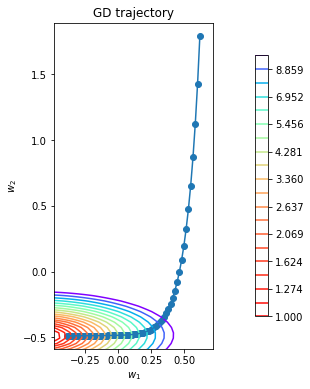

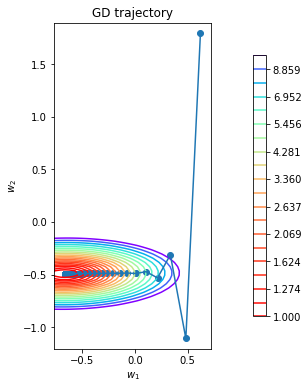

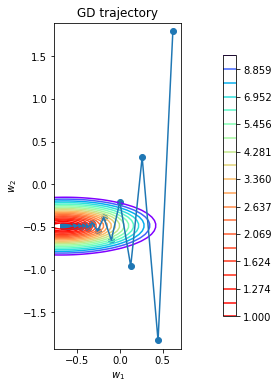

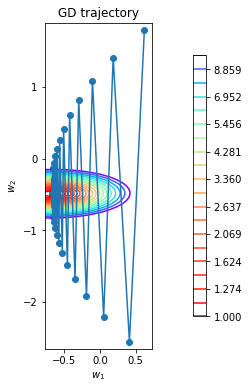

In [10]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.001, 100), X, y, loss) # график траектории для длины шага 0.001
plot_gd(gradient_descent(w_init, X, y, loss, 0.008, 100), X, y, loss) # график траектории для длины шага 0.008
plot_gd(gradient_descent(w_init, X, y, loss, 0.01, 100), X, y, loss) # график траектории для длины шага 0.01
plot_gd(gradient_descent(w_init, X, y, loss, 0.012, 100), X, y, loss) # график траектории для длины шага 0.012

Из полученных результатов видно, что для шага 0.001 траектория идет довольно плавно, но из-за маленького числа итераций она не может дойти до минимума потерь. Из-за большого же шага как в примере с длиной 0.012 траектория движется довольно резко из-за большого шага, и при приближении к минимуму проскакивает его. Наиболее же логичным выглядит траектория с длиной шага 0.01. С данным шагом модели удается наиболее быстро дойти до минимума. Для шага 0.008 же для этого требуется больше итераций. Можно сказать, что шаг не должен быть слишком маленьким и слишком большим.

### Функцию `stochastic_gradient_descent`


In [11]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # создаю массив с начальным положением весов модели
    path = [w_init]
    # с помощью цикла провожу итерации градиентного спуска, где записываю последующие веса модели, беря для их вычисления самый последний набор весов в траектории и выбираю случайные объекты
    for _ in range(n_iterations - 1): 
        ranch = np.random.choice(np.arange(len(y)), size = batch_size) # беру случайные индексы, чтобы применить их на массивы x и y
        path.append(path[-1] - lr*loss.calc_grad(X[ranch], y[ranch], path[-1]))
    # возврщаю траекторию весов    
    return path

Нарисую траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`).

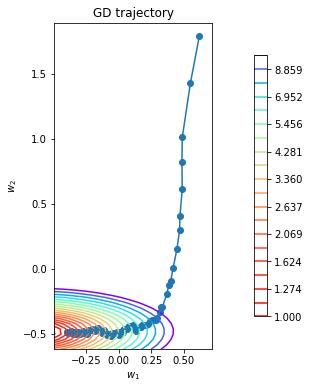

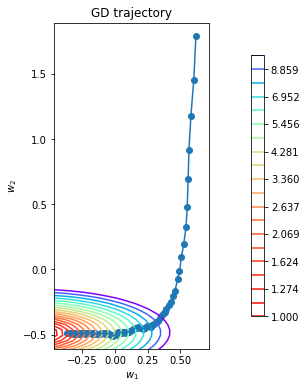

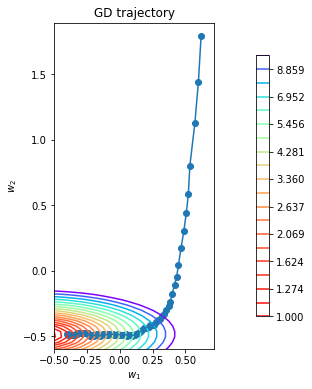

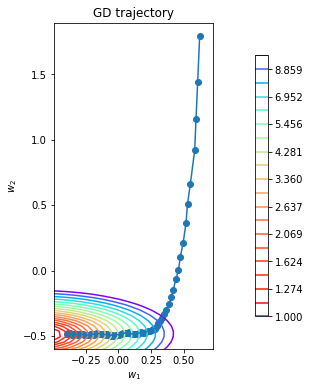

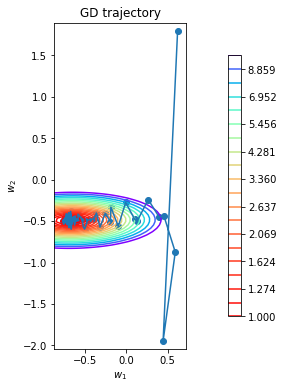

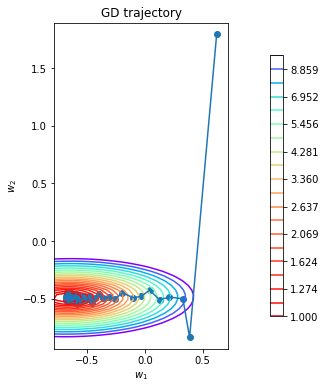

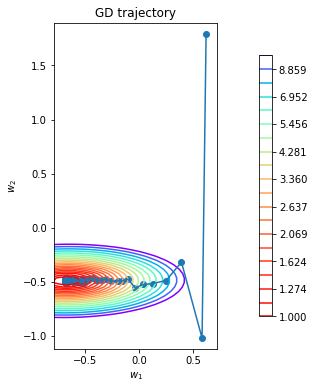

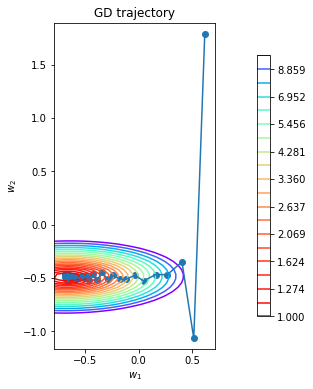

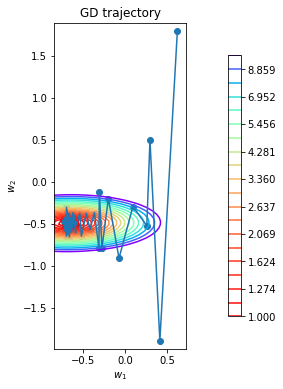

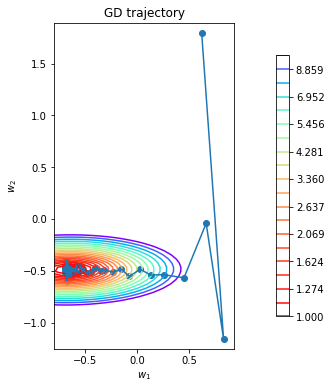

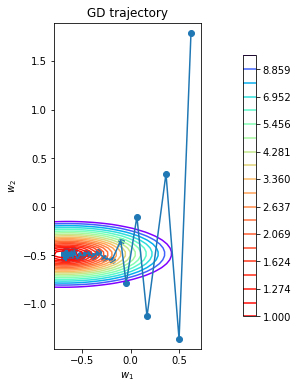

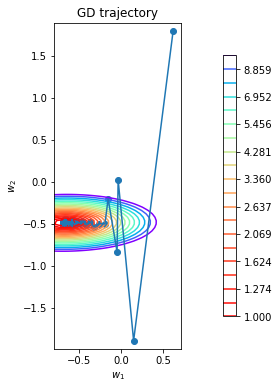

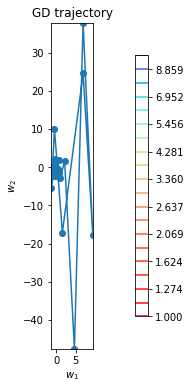

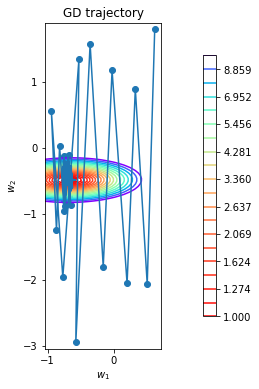

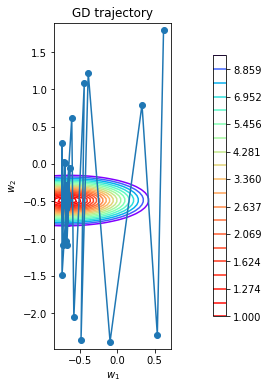

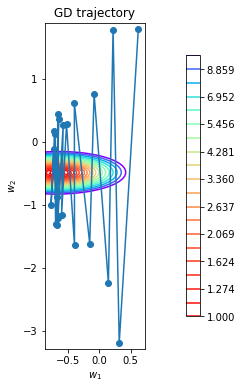

In [12]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.001, 10, 100), X, y, loss) # график траектории для длины шага 0.001 и размера случайной выборки объектов 10 
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.001, 50, 100), X, y, loss) # график траектории для длины шага 0.001 и размера случайной выборки объектов 50
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.001, 80, 100), X, y, loss) # график траектории для длины шага 0.001 и размера случайной выборки объектов 80
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.001, 100, 100), X, y, loss) # график траектории для длины шага 0.001 и размера случайной выборки объектов 100

plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.008, 10, 100), X, y, loss) # график траектории для длины шага 0.008 и размера случайной выборки объектов 10
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.008, 50, 100), X, y, loss) # график траектории для длины шага 0.008 и размера случайной выборки объектов 50 
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.008, 80, 100), X, y, loss) # график траектории для длины шага 0.008 и размера случайной выборки объектов 80
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.008, 100, 100), X, y, loss) # график траектории для длины шага 0.008 и размера случайной выборки объектов 100

plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 100), X, y, loss) # график траектории для длины шага 0.01 и размера случайной выборки объектов 10
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 50, 100), X, y, loss) # график траектории для длины шага 0.01 и размера случайной выборки объектов 50
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 80, 100), X, y, loss) # график траектории для длины шага 0.01 и размера случайной выборки объектов 80
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 100, 100), X, y, loss) # график траектории для длины шага 0.01 и размера случайной выборки объектов 100

plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.012, 10, 100), X, y, loss) # график траектории для длины шага 0.012 и размера случайной выборки объектов 10
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.012, 50, 100), X, y, loss) # график траектории для длины шага 0.012 и размера случайной выборки объектов 50
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.012, 80, 100), X, y, loss) # график траектории для длины шага 0.012 и размера случайной выборки объектов 80
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.012, 100, 100), X, y, loss) # график траектории для длины шага 0.012 и размера случайной выборки объектов 100

Для маленького шага наиболее плавной траекторией являет та, что имеет наиболший масштаб выборки. Для чуть большего шага видно, что из-за маленькой выборки траектория может сместится не в том направлении, где имеется локальный минимум, что может послужить использованию большего количества итераций, чтобы дойти до минимума. Для случая с нибольшим шагом эта проблема видна отчетливей. Траектория не только перескакивает минимум, но и требует больше итераций. Таким образом, можно сказать, что стохастический градиент сильно зависит как от длины шага, так и от размера выборки. Стохастический градиент выигрывает некоторое время работы от операции вычисления градиента не по всей выборке, однако из-за слишком маленького размера выборки может потерять это преимущество. 

### Функция `stochastic_gradient_descent` с затухающим шагом 

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # создаю массив с начальным положением весов модели
    path = [w_init]
    # с помощью цикла провожу итерации градиентного спуска, где записываю последующие веса модели, беря для их вычисления самый последний набор весов в траектории
    for t in range(n_iterations - 1): 
        ranch = np.random.choice(np.arange(len(y)), size = batch_size) # беру случайные индексы, чтобы применить их на массивы x и y
        path.append(path[-1] - (lr*(1/(1 + t))**p)*loss.calc_grad(X[ranch], y[ranch], path[-1])) # считаю размер шага по формуле и домножаю на градиент
    # возвращаю траекторию весов
    return path

Нарисую траекторию градиентного спуска для разных значений параметра `p`. 

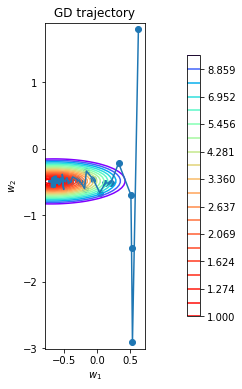

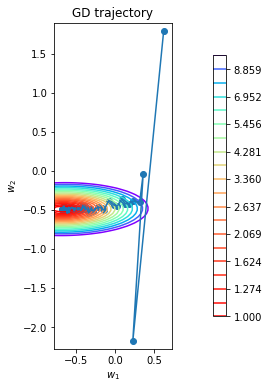

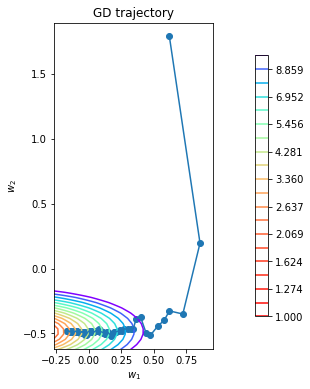

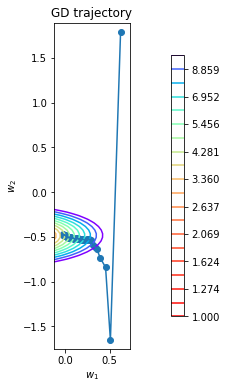

In [14]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.1, 100), X, y, loss)  # график траектории для p = 0.1
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.3, 100), X, y, loss)  # график траектории для p = 0.3
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.8, 100), X, y, loss)  # график траектории для p = 0.8
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 1, 100), X, y, loss)  # график траектории для p = 1

При s = 1 и при p = 0.1 видно, что первый шаг получается слишком большим, что слишком сильно отклонило траекторию от минимума. Наиболее же логичным является траектория при p = 0.3, так как шаг уменьшается не так как при больших значениях, и доходит до минимума. При более больших p размер шага уменьшается достаточно быстро, чтобы за 100 итераций не удалось дойти до минимума. 

Сравню сходимость обычного градиентного спуска и стохастичекой версии:
Нарисую график зависимости значения лосса от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами.

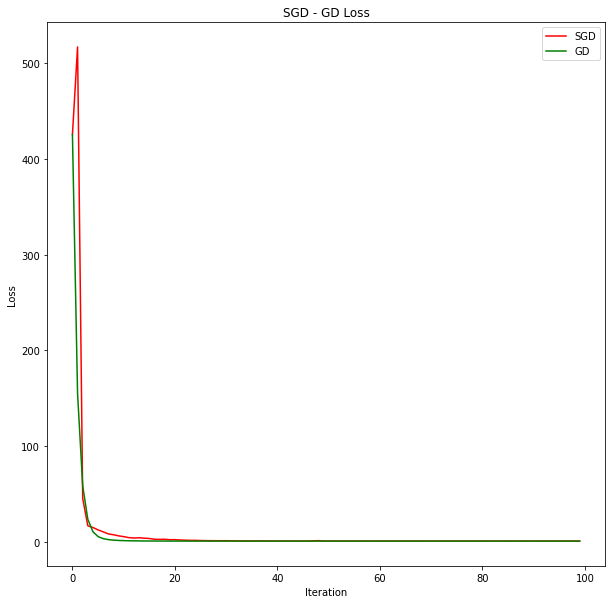

In [15]:
plt.figure(figsize = (10,10))
plt.title("SGD - GD Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
SGD = plt.plot(np.arange(100), list(map(lambda x: loss.calc_loss(X, y, x), stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.3, 100))), color = "red", label = "SGD")
GD = plt.plot(np.arange(100), list(map(lambda x: loss.calc_loss(X, y, x), gradient_descent(w_init, X, y, loss, 0.01, 100))), color = "green", label = "GD")
plt.legend()
plt.show()

Из графика видно, что GD имеет преимуущество при начальных итерациях, однако работает он при этом медленнее. Еще можно сказать, что при большом количестве итераций потери все же становятся одинаковыми для этих видов градиетного спуска. SGD имеет больше потерь, потому что работает с некоторой выборкой исходных объектов, что может повлиять на градиент при вычислении нового набора весов.

## Линейная регрессия

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

### Класс линейной регрессии

In [16]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        # присваиваю последний набор весов в траектории градиентного спуска
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr, 1000)[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        # возвращаю предсказанные значения
        return X @ self.w.T

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 


In [17]:
linear_regression = LinearRegression(MSELoss(), 0.01)

Применим нашу регрессию на реальном датасете. 

In [18]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [19]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

### Обработка датасета

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# для категориальных пяризнаков заполняю пропущенные значения пустыми строками
cat_features_mask = (X_raw.dtypes == "object").values
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna('')
X_no_mis = pd.concat([X_raw[X_raw.columns[~cat_features_mask]], X_cat], axis = 1)

# применяб one-hot кодирование для категориальных признаков
X_no_mis = pd.get_dummies(X_no_mis, drop_first=True)

# разделяю выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_no_mis, y, test_size = 0.3, shuffle = True)

normalizer = StandardScaler()

# заполняю пропуски в тренировочной выборке 
mis_replacer = SimpleImputer(strategy="mean")
X_train_no_mis = pd.DataFrame(data=mis_replacer.fit_transform(X_train), columns = X_train.columns)

# масштабирую признаки тренировочной выборке
X_train_real_norm = pd.DataFrame(data = normalizer.fit_transform(X_train_no_mis), columns = X_train_no_mis.columns)

# заполняю пропуски в тестовой выборке 
X_test_no_mis = pd.DataFrame(data=mis_replacer.fit_transform(X_test), columns = X_test.columns)

# масштабирую признаки тестовой выборке
X_test_real_norm = pd.DataFrame(data = normalizer.fit_transform(X_test_no_mis), columns = X_test_no_mis.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [21]:
lr_ob = linear_regression.fit(X_train_real_norm, y_train)  # обучаю линейную регрессию на тренировочной выборке

In [22]:
from sklearn.metrics import mean_squared_error

print("Ошибка на тренировочной выборке:", mean_squared_error(lr_ob.predict(X_train_real_norm), y_train)) # c помощью mean_squared_error считаю среднюю ошибку для тренировочной выборки
print("Ошибка на тестовой выборке:", mean_squared_error(lr_ob.predict(X_test_real_norm), y_test)) # c помощью mean_squared_error считаю среднюю ошибку для тестовой выборки

Ошибка на тренировочной выборке: 1486250.4734877867
Ошибка на тестовой выборке: 14338612.0243711


Наша модель переобучилась, добавим к ней L2 регуляризацию. 

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

In [23]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # возвращаю потери по формуле без константного веса 
        return ((np.linalg.norm((X @ w.T - y))**2)/len(y) + self.coef*np.linalg.norm(w[0:-1])**2)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # возвращаю градиент по формуле, заранее занулив константный признак
        w_b = w.copy()
        w_b[-1] = 0
        return (2 * X.T @ (X @ w.T - y))/len(y) + 2*self.coef*w_b

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [24]:
linear_regression_1 = LinearRegression(MSEL2Loss(0.005))

In [25]:
lr_ob1 = linear_regression_1.fit(X_train_real_norm, y_train) # обучаю линейную регрессию с регуляризаццией на тренировочной выборке

print("Ошибка на тренировочной выборке:", mean_squared_error(lr_ob1.predict(X_train_real_norm), y_train)) # c помощью mean_squared_error считаю среднюю ошибку для тренировочной выборки
print("Ошибка на тестовой выборке:", mean_squared_error(lr_ob1.predict(X_test_real_norm), y_test)) # c помощью mean_squared_error считаю среднюю ошибку для тестовой выборки

Ошибка на тренировочной выборке: 8.263975494766913e+146
Ошибка на тестовой выборке: 7.204773834566331e+146


Ошибка при регуляризации стала больше

В нашем датасете могут быть выбросы. Функция потерь Huber Loss'а  выглядит так:

$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


градиент:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

In [26]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """ 
        # возвращаю число потерь, которую ищу через две суммы, которые принимают в себя условия, и при их выполнении считают элемент соответсвующим образом
        return (np.sum(((X @ w.T - y)**2)/2*(abs(X @ w.T - y) < self.eps)) + np.sum(self.eps*(abs(X @ w.T - y) - self.eps/2)*(abs(X @ w.T - y) >= self.eps)))/len(y)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """

        # возвращаю градиент, которую стчитаю по формуле, аналогично используя условия как и при подсчете потерь
        sumg = np.zeros([1,X.shape[1]])
        for i in range(X.shape[0]):
            sumg += (X[i] * (X[i] @ w.T - y[i])*(abs(X[i] @ w.T - y[i]) < self.eps)) + (X[i] * self.eps * np.sign(X[i] @ w.T - y[i])*(abs(X[i] @ w.T - y[i]) >= self.eps)) 
        return sumg/len(y)

In [27]:
linear_regression_2 = LinearRegression(HuberLoss(170))
lr_ob2 = linear_regression_2.fit(X_train_real_norm, y_train)
print("Ошибка на тренировочной выборке:", mean_squared_error(lr_ob2.predict(X_train_real_norm), y_train))
print("Ошибка на тестовой выборке:", mean_squared_error(lr_ob2.predict(X_test_real_norm), y_test))

Ошибка на тренировочной выборке: 8155352.386935711
Ошибка на тестовой выборке: 7868912.465206038


Ошибка при функции потерь Хубса для тестовой выборки стала меньше, чем при исходной функции потерь.